# Linear regression from scratch
## author: Dr. Reynier Cruz Torres

Below, we implement a linear regression algorithm in python from scratch, using batch gradient descent. We begin by creating the dataset which corresponds to a linear relationship with noise. Our data will have one feature so that we can visualize later on the regression result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

Text(0, 0.5, 'y')

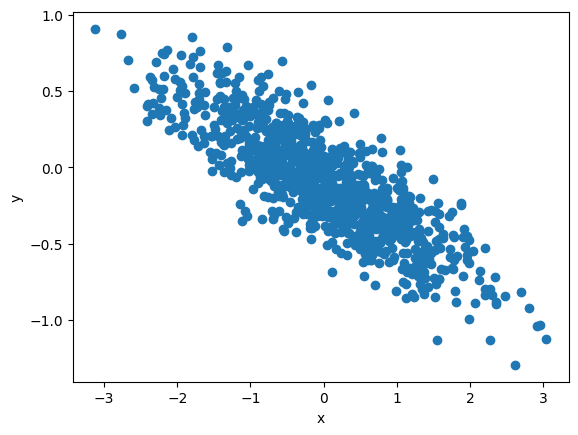

In [2]:
# Load or, in this case, generate the data
def generate_data(m=-0.3,npoints=1000):
    X = np.random.randn(npoints)
    y = X.dot(m)+0.2*(np.random.randn(npoints)-0.5)
    return X, y

X, y = generate_data()

# Scale the data
X = X.reshape(len(X),1)
X = X/np.std(X)

# Visualize the data
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')

Mean squared error loss function:

### $L = \frac{1}{N} \sum \Big( y_{\rm true} - y_{\rm pred}\Big)^2$

where

### $y_{\rm pred} = X \cdot w + b$

In [3]:
# Forward pass
def forward(w,b,X):
    return np.dot(X,w)+b

# Loss function (mean squared error)
def mse_cost_function(y_pred,y_true):
    return np.mean(np.square(y_pred-y_true))

# Learning rate (very small so that we see the evolution of the model)
learning_rate = 0.0001

# Initialize model parameters
num_features = X.shape[1]
w = np.random.randn(num_features)
b = np.random.randn()

What we need is to tweak the weights and biases in a way that reduces the loss function. Gradient descent tells us how to do that. We need to subtract the gradient of the loss function (multiplied by the learning rate) at each point:

### $w \leftarrow w - \nabla_{w} L$

### $b \leftarrow b - \nabla_{b} L$

For our specific loss function (mean squared error) the gradient with respect to weights and biases corresponds to:

### $\frac{\partial L}{\partial w} = \frac{2}{N} \sum \Big((y_{\rm pred}-y_{\rm true})\cdot X \Big)$

### $\frac{\partial L}{\partial b} = \frac{2}{N} \sum (y_{\rm pred}-y_{\rm true})$

In [4]:
saved_w, saved_b, saved_cost, saved_iter = [], [], [], []

# Train the model
num_iterations = 10000
for i in range(num_iterations):
    
    # Forward pass
    y_pred = forward(w,b,X)
    
    # compute the gradient of the cost function with respect to w and b
    gw = 2.*np.mean(np.dot(y_pred-y,X))
    gb = 2.*np.mean(y_pred-y)

    # Update the weight (bias) by subtracting the gradient of the cost
    # function with respect to it multiplied by the learning rate.
    w -= learning_rate*gw
    b -= learning_rate*gb
    
    # Calculate the cost function
    cost = mse_cost_function(y_pred,y)
    
    # Save some values for subsequent plotting
    saved_cost.append(cost)
    saved_iter.append(i)
    saved_w.append(w[0])
    saved_b.append(b)

Finally, we can plot our data along with the evolution of the regression with training and the loss function.

Text(0.5, 0.7, 'batch gradient descent')

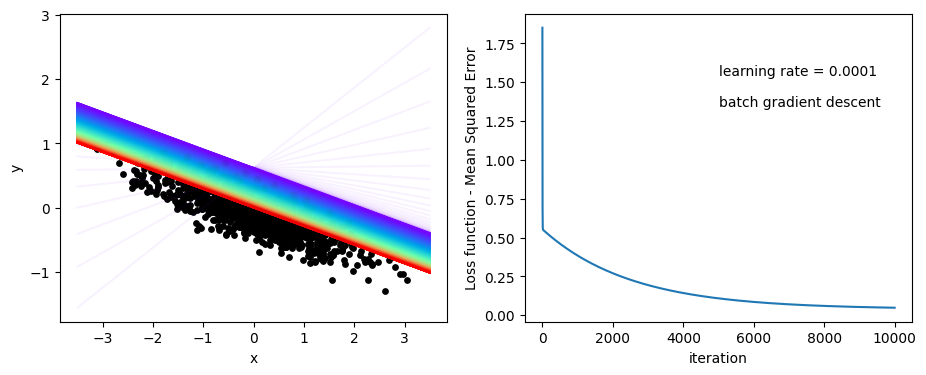

In [5]:
fig, ax = plt.subplots(ncols=2,figsize=(11,4))

ax[0].scatter(X,y,color='black',s=15)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

color = cm.rainbow(np.linspace(0, 1, len(saved_w)))

x_fits=[-3.5,3.5]

y_fits = []

for i in range(len(saved_w)):
    y_fits.append([x_fits[0]*saved_w[i]+saved_b[i],x_fits[1]*saved_w[i]+saved_b[i]])
    ax[0].plot(x_fits,y_fits[i],color=color[i],alpha=0.05)

ax[1].plot(saved_iter,saved_cost)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('Loss function - Mean Squared Error')
ax[1].text(0.5,0.8,'learning rate = {}'.format(learning_rate),transform=ax[1].transAxes)
ax[1].text(0.5,0.7,'batch gradient descent',transform=ax[1].transAxes)